In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
sns.set()

In [2]:
def nD_to_2D(df, chosenColumns):
    c0 = chosenColumns[0]
    c1 = chosenColumns[1]
    param0 = df[c0].unique()
    param1 = df[c1].unique()
    df_2D = pd.DataFrame(columns = [c0, c1, 'winRate'])
    for p0 in param0:
        for p1 in param1:
            data = df[(df[c0] == p0) & (df[c1] == p1)]
            if data.shape[0] != 0:
                winRate = sum(data['winRate']) / data.shape[0]
            else:
                winRate = 0
            df_2D.loc[len(df_2D)] = [p0, p1, winRate]
    return df_2D

In [3]:
def df2D_to_heatmap(df_2D, index_2d, columns_2d, values_2d, vmin, vmax):
    df_2D = df_2D.pivot(index=index_2d, columns=columns_2d, values=values_2d)
    ax = sns.heatmap(df_2D, vmin = vmin, vmax = vmax, cmap='rainbow') #, cmap='gray'
    ax.invert_yaxis()
    return ax

In [4]:
def print_all_heatmap(df, vmin, vmax):
    columns = df.columns
    df_len = df.columns.shape[0]
    for i in range(df_len - 1):
        for j in range(i + 1, df_len - 1):
            x = columns[i]
            y = columns[j]
            df_2D = nD_to_2D(df, [x, y])
            df2D_to_heatmap(df_2D, x, y, 'winRate', vmin, vmax)
            plt.show()

# Read data 

MeldabilityHE (it1-1E.csv)

In [5]:
vmin_meldability = 0.68
vmax_meldability = 0.75

In [6]:
meldability_data = pd.read_csv('it1-1E.csv', index_col = 'ID')
meldability_data.round(4) 
meldability_data.head()

,p3,p4,p5,p6,winRate
ID,,,,,
0,0.0,0.0,0.0,1.0,0.6873
1,0.0,0.0,0.1,0.9,0.6996
2,0.0,0.0,0.2,0.8,0.7036
3,0.0,0.0,0.3,0.7,0.7073
4,0.0,0.0,0.4,0.6,0.7005


ConvHE (it1-2E.csv)

In [7]:
vmin_conv = 0.6
vmax_conv = 0.75

In [8]:
conv_data = pd.read_csv('it1-2E.csv', index_col = 'ID')
#conv_data.drop('ID', axis = 1, inplace = True)
conv_data.round(4)
conv_data.head()

,p0,p1,p2,winRate
ID,,,,
0,0.0,0.5,0.5,0.6760
1,0.0,0.6,0.4,0.6911
2,0.0,0.7,0.3,0.6867
3,0.0,0.8,0.2,0.6862
4,0.0,0.9,0.1,0.6823


LinearDeadwoodPenaltyHE (it1-3E.csv)

In [9]:
vmin_linear_dw = 0.55
vmax_linear_dw = 0.75

In [10]:
linear_dw_data = pd.read_csv('it1-3E.csv', index_col = 'ID')
linear_dw_data.round(4)
linear_dw_data.head()

,p22,p23,winRate
ID,,,
0,0.0,0.00,0.7110
1,0.0,0.25,0.7104
2,0.0,0.50,0.7030
3,0.0,0.75,0.7136
4,0.0,1.00,0.7089


OppCardsKnownDeadwoodPenaltyHE (it1-4E.csv)

In [11]:
vmin_opp_known_dw = 0.55
vmax_opp_known_dw = 0.75

In [12]:
opp_known_dw_data = pd.read_csv('it1-4E.csv', index_col = 'ID')
opp_known_dw_data.round(4)
opp_known_dw_data.head()

,p24,p25,winRate
ID,,,
0,0.0,0.00,0.7097
1,0.0,0.25,0.7194
2,0.0,0.50,0.7052
3,0.0,0.75,0.7019
4,0.0,1.00,0.7074


Ensemble weight(it1-6E.csv)

In [13]:
vmin_weight = 0.6
vmax_weight = 0.75

In [14]:
weight_data = pd.read_csv('it1-6E.csv', index_col = 'ID')
weight_data.round(4)
weight_data.head()

,p31,p32,p33,p34,p35,p36,winRate
ID,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.67100
1,0.0,0.0,0.0,0.0,0.1,0.9,0.66550
2,0.0,0.0,0.0,0.0,0.2,0.8,0.67250
3,0.0,0.0,0.0,0.0,0.3,0.7,0.65850
4,0.0,0.0,0.0,0.0,0.4,0.6,0.66375


# Visualization by fixing to after-values (ex p5=0.4, p6=0.6)

In [15]:
best_param_after_it1 = [0.4, 0.4, 0.2, 0.35, 0.9, 0.4, 0.6, 0.05, 0.5, 0.4, 0.6, 0.8380616650330837, 0.06152068390417398, 0.38258062302368523, 0.39810496473742085, 0.10844666639491507, 0.37763392278384067, 0.2706576839587317, 0.2077890824329678, 0.47922119839098565, 1.0, 1.0, 0.0, 2.75, 0.0, 2.0, 10.0, 0.0, 6.0, 8.0, 14.0, 0.2, 0.1, 0.0, 0.1, 0.5, 0.1]
best_param_after_it1[3:7]

[0.35, 0.9, 0.4, 0.6]

MeldabilityHE (it1-1E.csv)

In [16]:
meldability_data[(meldability_data['p5'] == 0.4) & (meldability_data['p6'] == 0.6)]

,p3,p4,p5,p6,winRate
ID,,,,,
4,0.0,0.0,0.4,0.6,0.7005
15,0.0,0.1,0.4,0.6,0.7053
26,0.0,0.2,0.4,0.6,0.7049
37,0.0,0.3,0.4,0.6,0.7070
48,0.0,0.4,0.4,0.6,0.7055
...,...,...,...,...,...
1280,0.5,0.6,0.4,0.6,0.7041
1291,0.5,0.7,0.4,0.6,0.7087
1302,0.5,0.8,0.4,0.6,0.7041


## fix p5 == 0.4 and p6 == 0.6

In [17]:
meldability_data_drop_p5_p6 = meldability_data[(meldability_data['p5'] == 0.4) & (meldability_data['p6'] == 0.6)].drop(['p5', 'p6'], axis = 1)
meldability_data_drop_p5_p6.head()

,p3,p4,winRate
ID,,,
4,0.0,0.0,0.7005
15,0.0,0.1,0.7053
26,0.0,0.2,0.7049
37,0.0,0.3,0.7070
48,0.0,0.4,0.7055


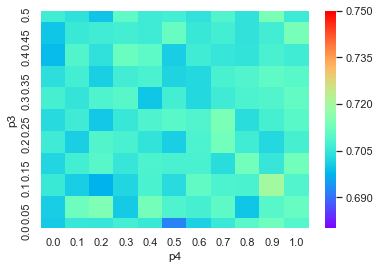

In [18]:
df2D_to_heatmap(meldability_data_drop_p5_p6, 'p3', 'p4', 'winRate', vmin_meldability, vmax_meldability)

## fix p3 and p4

In [19]:
meldability_data_drop_p3_p4 = meldability_data[(meldability_data['p3'] == best_param_after_it1[3]) & (meldability_data['p4'] == best_param_after_it1[4])].drop(['p3', 'p4'], axis = 1)
meldability_data_drop_p3_p4.head()

,p5,p6,winRate
ID,,,
946,0.0,1.0,0.6958
947,0.1,0.9,0.7004
948,0.2,0.8,0.7019
949,0.3,0.7,0.7058
950,0.4,0.6,0.7106


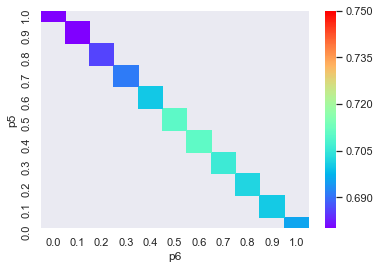

In [20]:
df2D_to_heatmap(meldability_data_drop_p3_p4, 'p5', 'p6', 'winRate', vmin_meldability, vmax_meldability)

ConvHE (it1-2E.csv)

In [21]:
conv_data

,p0,p1,p2,winRate
ID,,,,
0,0.0,0.5,0.5,0.6760
1,0.0,0.6,0.4,0.6911
2,0.0,0.7,0.3,0.6867
3,0.0,0.8,0.2,0.6862
4,0.0,0.9,0.1,0.6823
5,0.0,1.0,0.0,0.6600
6,0.1,0.5,0.4,0.6943
7,0.1,0.6,0.3,0.6986
8,0.1,0.7,0.2,0.6979


## Fix p0

In [22]:
conv_data_drop_p0 = conv_data[conv_data['p0'] == best_param_after_it1[0]].drop('p0', axis = 1)
conv_data_drop_p0

,p1,p2,winRate
ID,,,
20,0.3,0.3,0.7121
21,0.4,0.2,0.7116
22,0.5,0.1,0.7118
23,0.6,0.0,0.6977


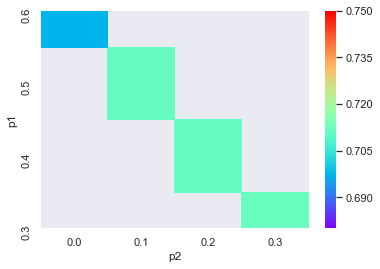

In [23]:
df2D_to_heatmap(conv_data_drop_p0, 'p1', 'p2', 'winRate', vmin_meldability, vmax_meldability)

## Fix p1

In [24]:
conv_data_drop_p1 = conv_data[conv_data['p1'] == best_param_after_it1[1]].drop('p1', axis = 1)
conv_data_drop_p1

,p0,p2,winRate
ID,,,
11,0.2,0.4,0.7023
16,0.3,0.3,0.7050
21,0.4,0.2,0.7116
25,0.5,0.1,0.7137
29,0.6,0.0,0.7063


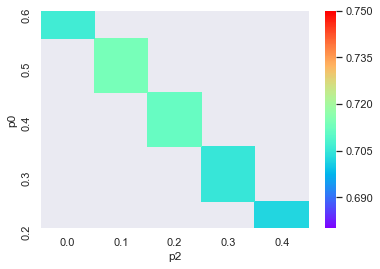

In [25]:
df2D_to_heatmap(conv_data_drop_p1, 'p0', 'p2', 'winRate', vmin_meldability, vmax_meldability)

## Fix p2

In [26]:
conv_data_drop_p2 = conv_data[conv_data['p2'] == best_param_after_it1[2]].drop('p2', axis = 1)
conv_data_drop_p2

,p0,p1,winRate
ID,,,
3,0.0,0.8,0.6862
8,0.1,0.7,0.6979
13,0.2,0.6,0.6979
17,0.3,0.5,0.6998
21,0.4,0.4,0.7116
24,0.5,0.3,0.7086
27,0.6,0.2,0.7123


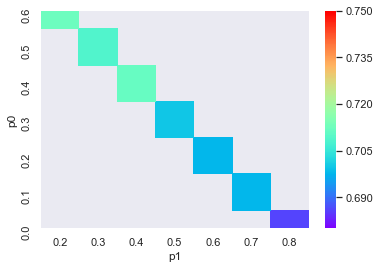

In [27]:
df2D_to_heatmap(conv_data_drop_p2, 'p0', 'p1', 'winRate', vmin_meldability, vmax_meldability)

# Visualization by taking average

MeldabilityHE (it1-1E.csv)

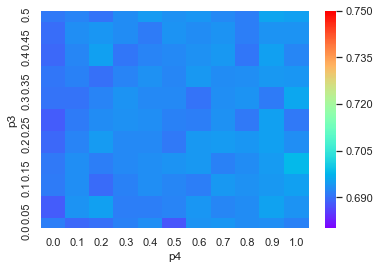

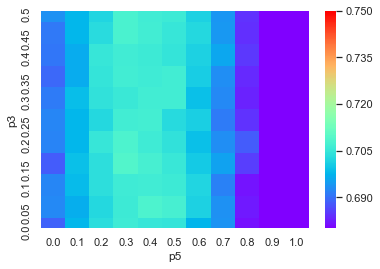

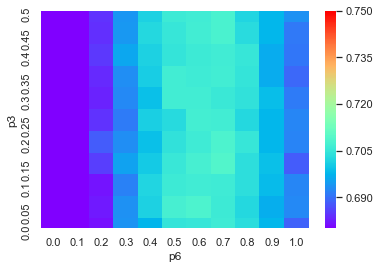

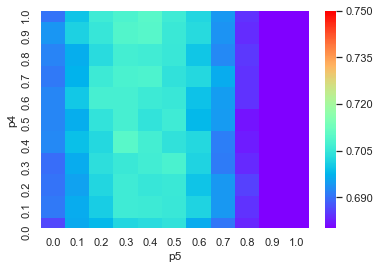

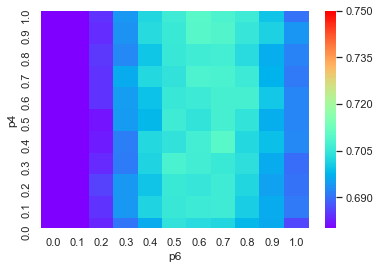

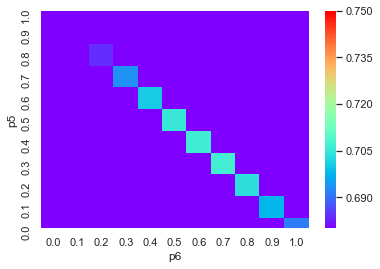

In [28]:
print_all_heatmap(meldability_data, vmin_meldability, vmax_meldability)

ConvHE (it1-2E.csv)

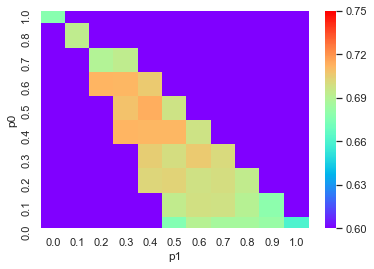

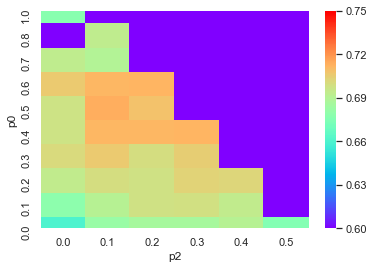

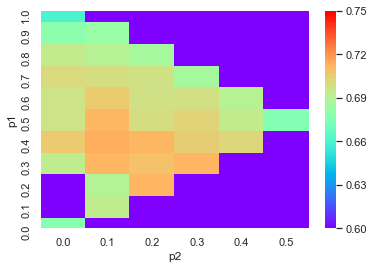

In [29]:
print_all_heatmap(conv_data, vmin_conv, vmax_conv)

LinearDeadwoodPenaltyHE (it1-3E.csv)

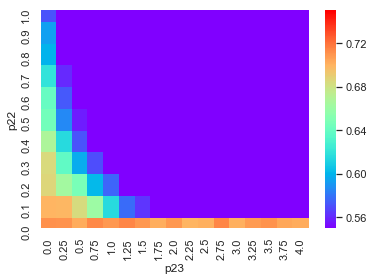

In [30]:
df2D_to_heatmap(linear_dw_data, 'p22', 'p23', 'winRate', vmin_linear_dw, vmax_linear_dw)

OppCardsKnownDeadwoodPenaltyHE (it1-4E.csv)

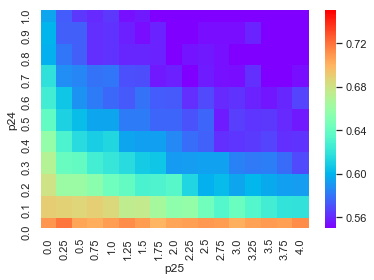

In [31]:
df2D_to_heatmap(opp_known_dw_data, 'p24', 'p25', 'winRate', vmin_opp_known_dw, vmax_opp_known_dw)

Ensemble weight(it1-6E.csv)

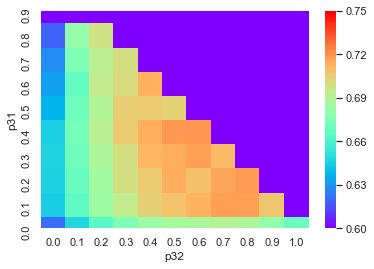

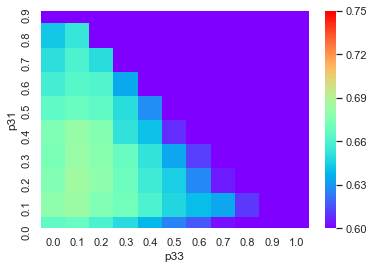

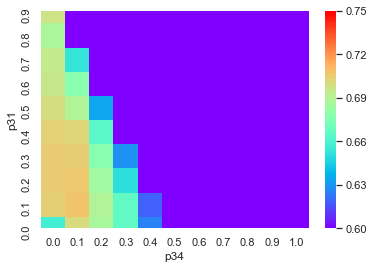

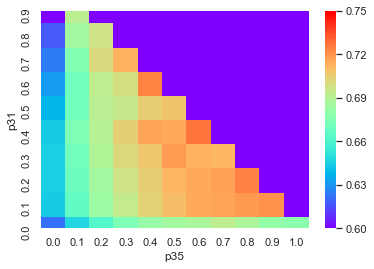

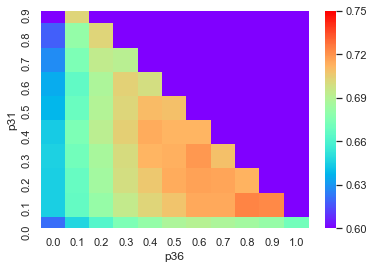

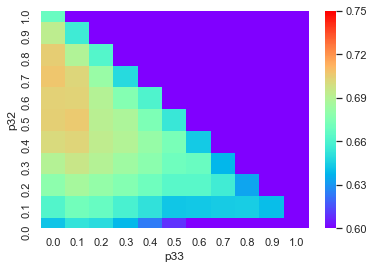

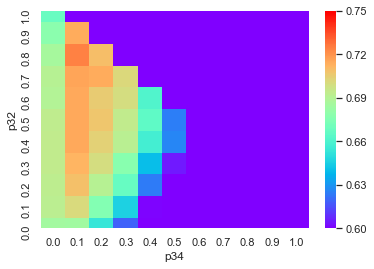

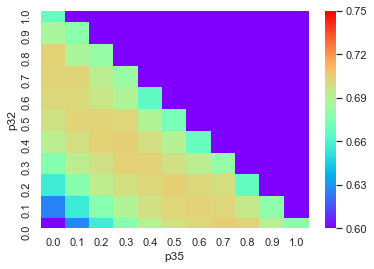

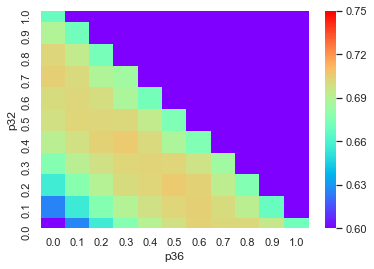

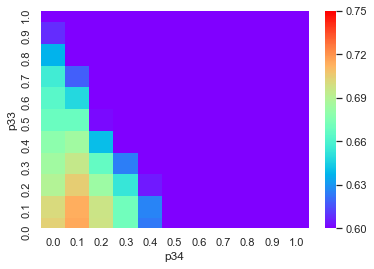

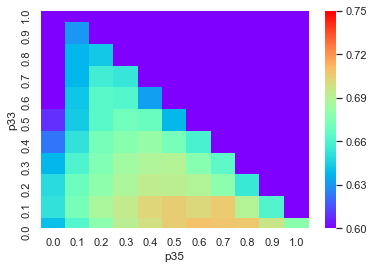

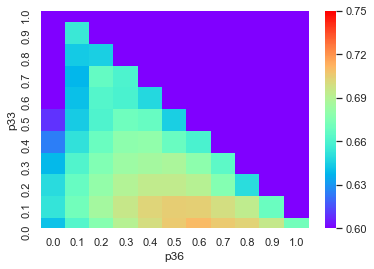

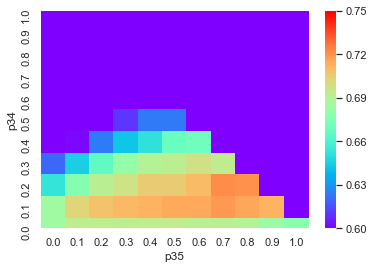

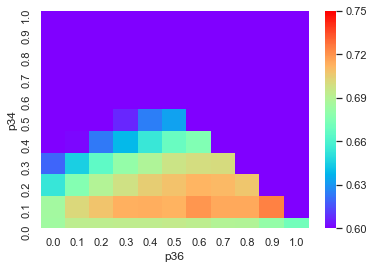

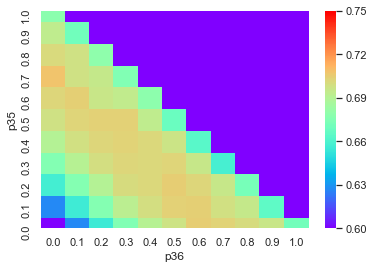

In [32]:
print_all_heatmap(weight_data, vmin_weight, vmax_weight)